In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df=pd.read_csv(r"C:\Users\usre\Downloads\Employee-Attrition.csv")

In [55]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [57]:
df.columns.str.lower()

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'educationfield', 'employeecount',
       'employeenumber', 'environmentsatisfaction', 'gender', 'hourlyrate',
       'jobinvolvement', 'joblevel', 'jobrole', 'jobsatisfaction',
       'maritalstatus', 'monthlyincome', 'monthlyrate', 'numcompaniesworked',
       'over18', 'overtime', 'percentsalaryhike', 'performancerating',
       'relationshipsatisfaction', 'standardhours', 'stockoptionlevel',
       'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance',
       'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion',
       'yearswithcurrmanager'],
      dtype='object')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [61]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [63]:
f=['Education','JobInvolvement','JobLevel','MonthlyIncome','YearsAtCompany','YearsInCurrentRole']
t=['PerformanceRating']

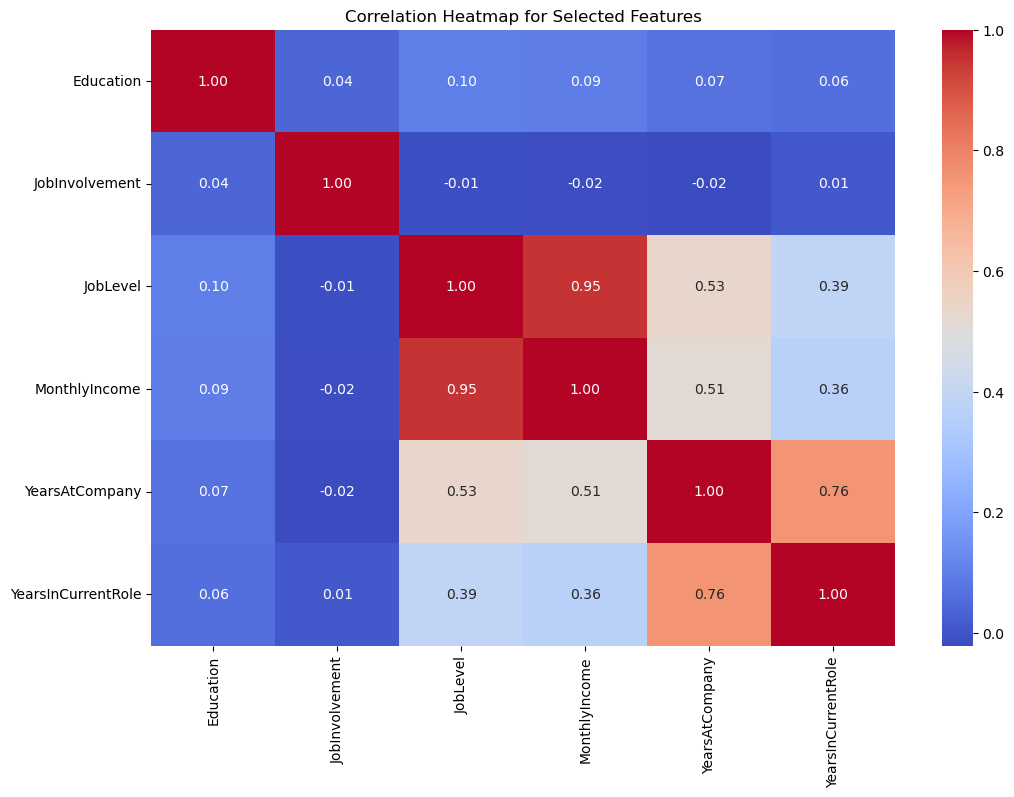

In [65]:
f=['Education','JobInvolvement','JobLevel','MonthlyIncome','YearsAtCompany','YearsInCurrentRole']
corr_df=df[f]
corrmatrix=corr_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corrmatrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title("Correlation Heatmap for Selected Features")
plt.show()

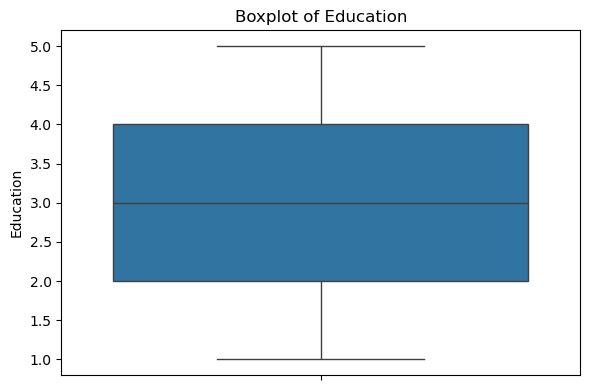

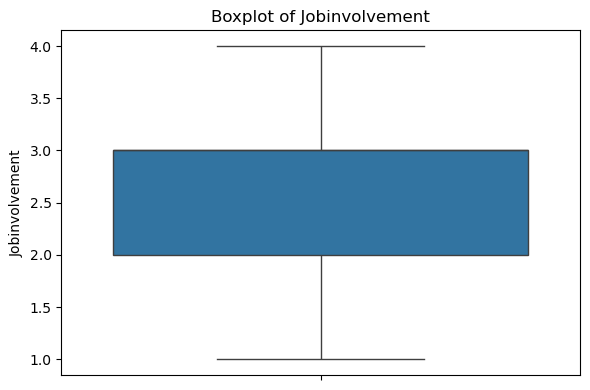

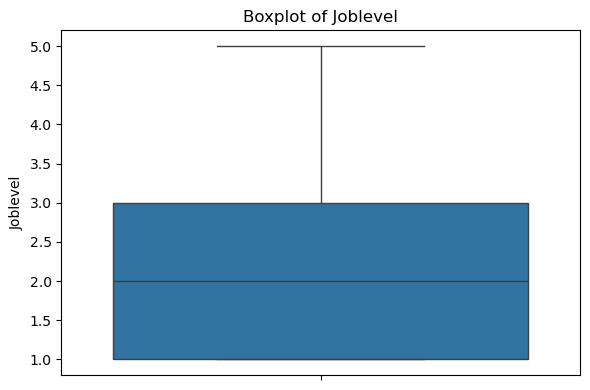

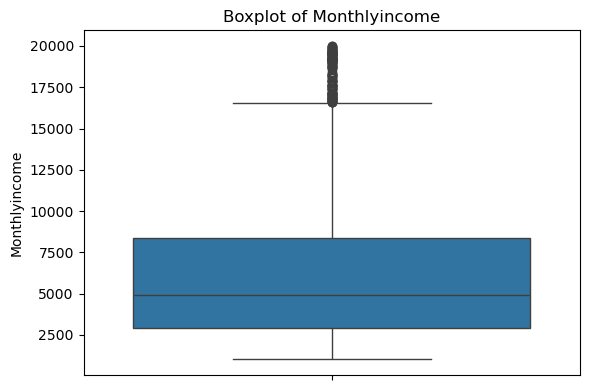

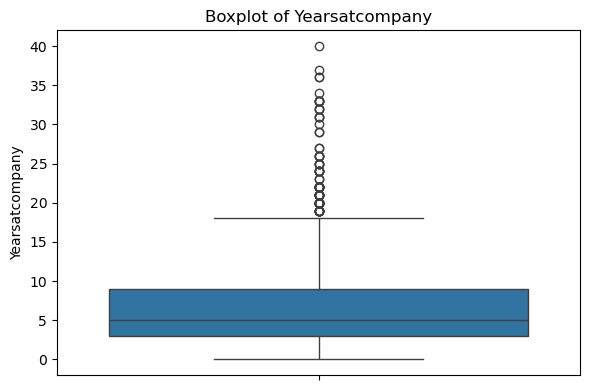

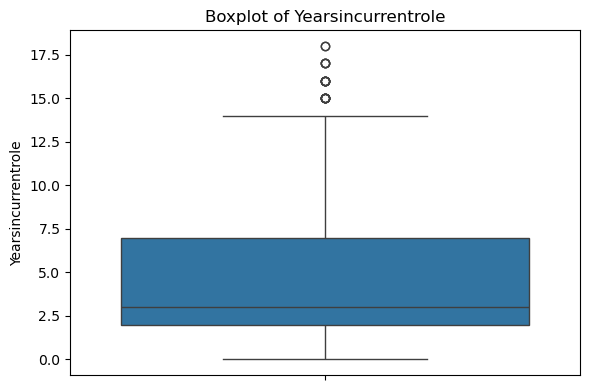

In [66]:
f=['Education','JobInvolvement','JobLevel','MonthlyIncome','YearsAtCompany','YearsInCurrentRole']
for col in f:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col.capitalize()}')
    plt.ylabel(col.capitalize())
    plt.tight_layout()
    plt.show()

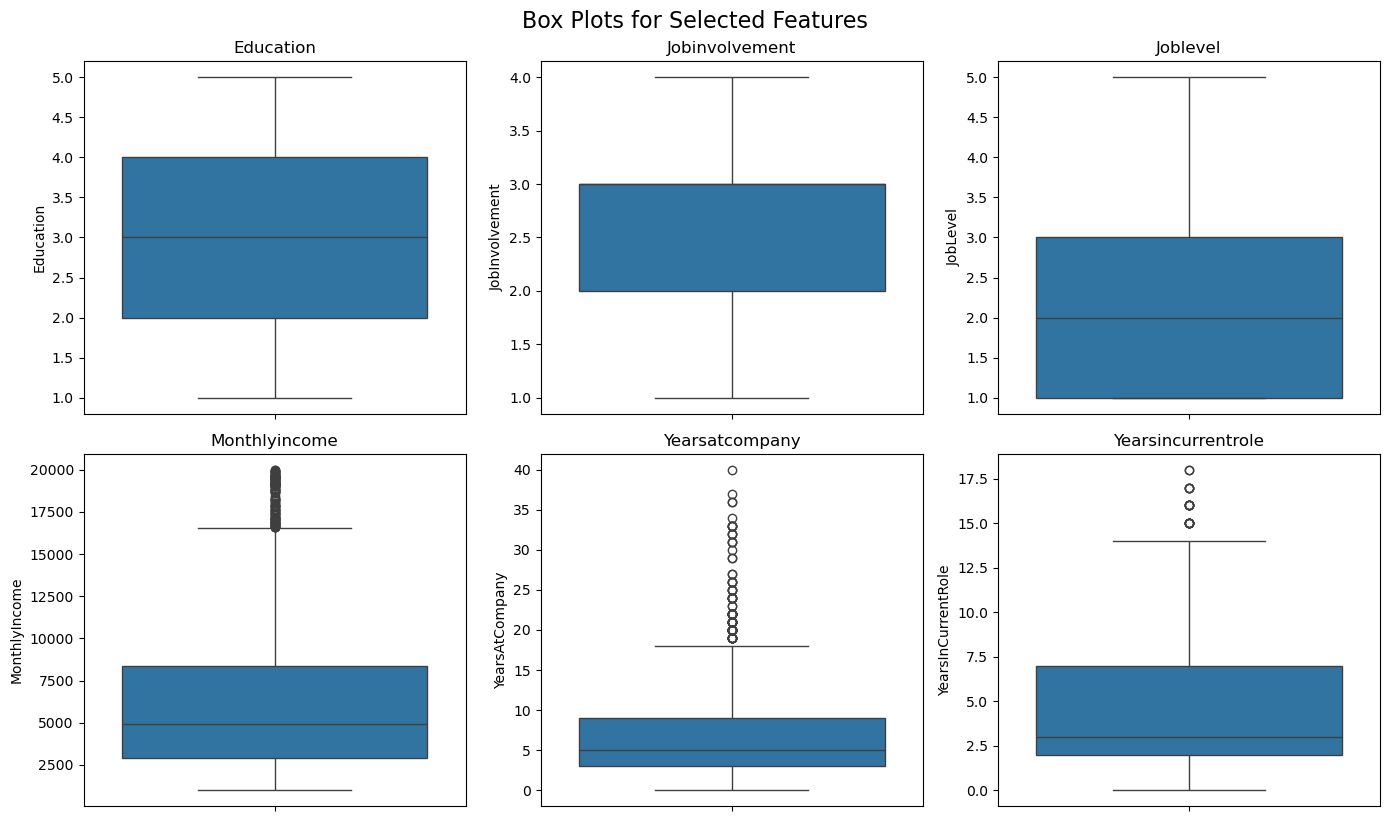

In [67]:
f=['Education','JobInvolvement','JobLevel','MonthlyIncome','YearsAtCompany','YearsInCurrentRole']
plt.figure(figsize=(14, 8))  # Width x Height
for i, col in enumerate(f, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns
    sns.boxplot(y=df[col])
    plt.title(col.capitalize())
    plt.tight_layout()

plt.suptitle("Box Plots for Selected Features", fontsize=16, y=1.02)
plt.show()

In [68]:
f=['MonthlyIncome','YearsAtCompany','YearsInCurrentRole']
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series.clip(lower, upper)

# Apply to selected columns
df[f] = df[f].apply(cap_outliers)

# Show summary of capped data
df[f].describe()

,MonthlyIncome,YearsAtCompany,YearsInCurrentRole
count,1470.000000,1470.000000,1470.000000
mean,6361.891837,6.617687,4.207823
std,4353.345470,4.989788,3.555335
min,1009.000000,0.000000,0.000000
25%,2911.000000,3.000000,2.000000
50%,4919.000000,5.000000,3.000000
75%,8379.000000,9.000000,7.000000
max,16581.000000,18.000000,14.500000


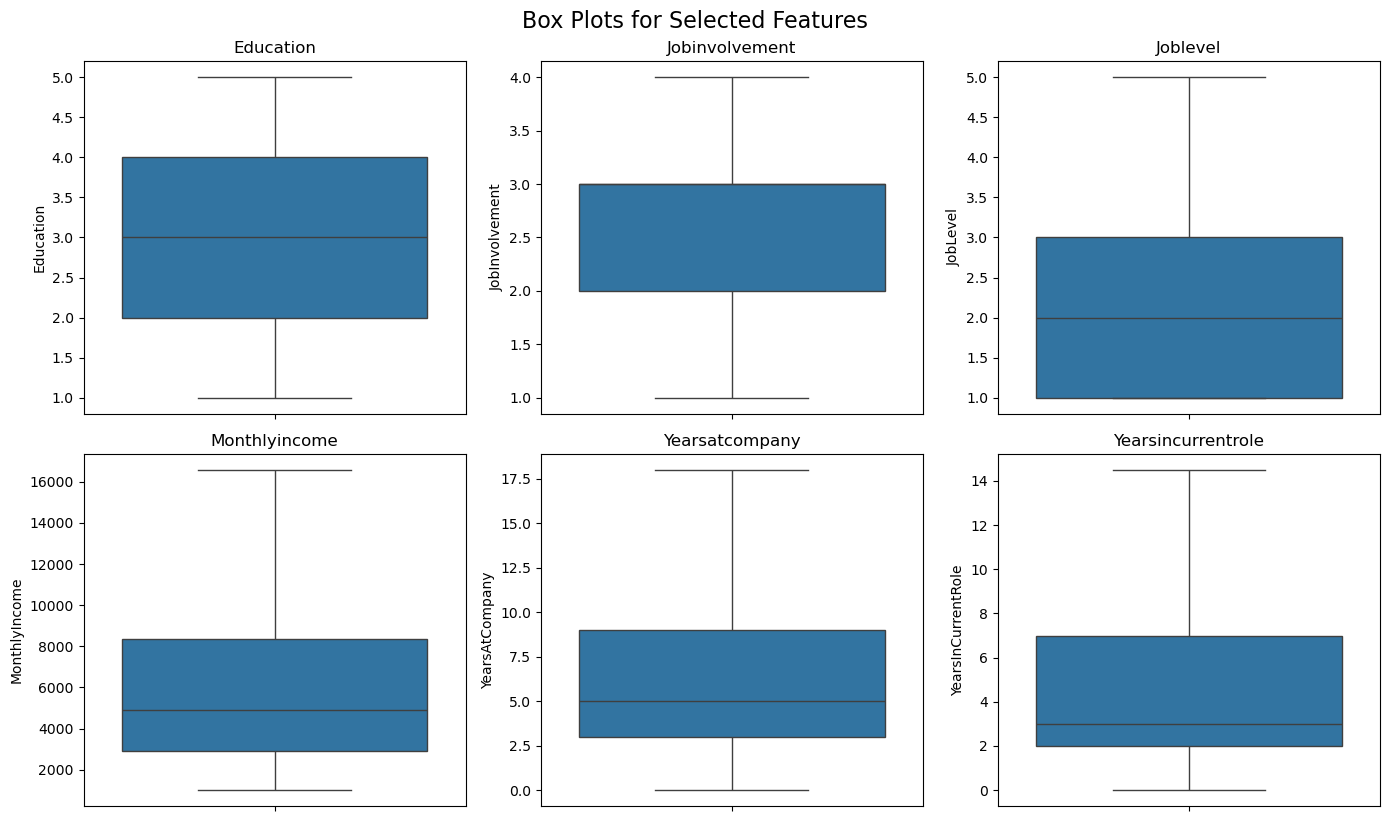

In [69]:
f=['Education','JobInvolvement','JobLevel','MonthlyIncome','YearsAtCompany','YearsInCurrentRole']
plt.figure(figsize=(14, 8))  # Width x Height
for i, col in enumerate(f, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns
    sns.boxplot(y=df[col])
    plt.title(col.capitalize())
    plt.tight_layout()

plt.suptitle("Box Plots for Selected Features", fontsize=16, y=1.02)
plt.show()

In [70]:
df['PerformanceRating'].value_counts()

PerformanceRating
3    1244
4     226
Name: count, dtype: int64

In [72]:
df['PerformanceRating'].unique()

array([3, 4], dtype=int64)

In [73]:
df['PerformanceRating'].dtype


dtype('int64')

In [95]:
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.combine import SMOTEENN

f=['Education','JobInvolvement','JobLevel','MonthlyIncome','YearsAtCompany','YearsInCurrentRole']
t=['PerformanceRating']
X=df[f]
y=df[t]

# Train-test split (use stratify to preserve class distribution)
X_train,X_test,y_train,y_test= train_test_split(X,y,stratify=y,test_size=0.2,random_state=42)

#Scaling
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

#Appling smote for training data alone

smote = SMOTE(random_state=42)
x_train_resampled,y_train_resampled=smote.fit_resample(X_train_scaled,y_train)

#Model Training

model = RandomForestClassifier(random_state=42)
model.fit(x_train_resampled,y_train_resampled)

#predict on test set
y_pred= model.predict(X_test_scaled)

#Evaluation

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")


C:\Users\usre\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Confusion Matrix:
[[231  18]
 [ 37   8]]

Classification Report:
              precision    recall  f1-score   support

           3       0.86      0.93      0.89       249
           4       0.31      0.18      0.23        45

    accuracy                           0.81       294
   macro avg       0.58      0.55      0.56       294
weighted avg       0.78      0.81      0.79       294


Accuracy: 0.8129


In [125]:
import pickle

with open('RM.pkl','wb') as f:
    pickle.dump(model,f)
print("Model Saved Successfully!")

          

Model Saved Successfully!


In [127]:
with open('sc.pkl', 'wb') as f:
    pickle.dump(scaler, f)